**Сборный проект №1**

**Задача**: выявить закономерности, определяющие успешность компьютерной игры, на основе открытых исторических данных за 2016 год о продажах игр, оценках пользователей и экспертов, жанрах и платформах.  
Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Поля в исходном наборе данных:  
- Name — название игры,  
- Platform — платформа,  
- Year_of_Release — год выпуска,  
- Genre — жанр игры,  
- NA_sales — продажи в Северной Америке (миллионы проданных копий),  
- EU_sales — продажи в Европе (миллионы проданных копий),  
- JP_sales — продажи в Японии (миллионы проданных копий),  
- Other_sales — продажи в других странах (миллионы проданных копий),  
- Critic_Score — оценка критиков (максимум 100),  
- User_Score — оценка пользователей (максимум 10),  
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).  

Значения рейтинга ESRB:
- E (Everyone, для всех)
- M (Mature, только для взрослых)
- T (Teen, подросткам)
- E10+ (Everyone 10 and older, всем старше 10 лет)
- K-A (раннее детство)
- AO (Adults Only 18+, только для взрослых 18+)
- EC (Early childhood, для детей младшего возраста)
- RP (Rating Pending, рейтинг ожидается)

Импортируем все библиотеки, которые нам понадобятся

In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as sp
from datetime import datetime as dt

### Открываем файл с данными

In [3]:
try:
    df=pd.read_csv('c:/users/bny_7/datasets/games.csv', sep=',')
except:
    df=pd.read_csv('/datasets/games.csv', sep=',')
display(df.head())    

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Первичные выводы:**
Длина набора данных - 16715 записей, 11 колонок.  
Типы данных не соответствуют в колонках: Year_of_Release, User_Score.  
Пропущенные значения имеются в колонках: Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating.  
Исправим их на следующем шаге.

### Предобрабатываем данные для анализа

Подготовим данные для анализа:
- заменим названия столбцов (приведем их к нижнему регистру);
- преобразуем данные в нужные типы: Year_of_Release(год выпуска) приведем к целочисленному знаяению, поскольку год не может быть дробным, а User_Score(оценка пользователя) - к числовому типу float, поскольку это оценка, выраженная числом с точкой;  
- пустые значения заменим на средние значения оценок внутри платформ, а значения 'tbd'=To Be Determined (оценка еще только будет определяться) заполним значениями NaN;
- обработаем пропуски.

In [5]:
#df=df.rename(columns={
#    'Name':'name',
#    'Platform':'platform',
#    'Year_of_Release':'year_of_release',
#    'Genre':'genre',
#    'NA_sales':'na_sales',
#   'EU_sales':'eu_sales',
#   'JP_sales':'jp_sales',
#    'Other_sales':'other_sales',
#    'Critic_Score':'critic_score',
#    'User_Score':'user_score',
#    'Rating':'rating'
#})
df.columns = df.columns.str.lower()
display(df.head())
df.describe()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
display(df.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Отсутствующие значения в поле *name* и поле *genre* находятся в одних и тех же строках. Предположим, что наименование игры мало влияет на ее продажи, а вот жанр может оказаться значимым фактором. Поскольку жанр - категориальная переменная, то заполнить его не удастся, поэтому удалим эти 2 строки из набора данных (это всего лишь 0,01% от общего числа записей). Сбросим индекс. 
Отсутствующие значения:
- в поле year_of_release составляет 1,6% (269 из 16715) от общего объема, так что эти данные тоже можно удалить;   
- critic_score, user_score, rating могут повлиять на расчет средних оценок и их количество велико (около 30-50%),
поэтому изучим, где присутствуют пропуски и есть ли между ними что-то общее.  

Наличие пропусков можно объяснить:
- отсутствием запроса производителя на сбор данных пользователей, критиков и определения рейтинга,
- отсутствием этой информации в открытых источниках,
- человеческим фактором.  

In [7]:
display(df[df['name'].isna()])
df = df.dropna(subset=['name'])
df = df.dropna(subset=['year_of_release'])
df.reset_index(drop=True, inplace=True)
df['year_of_release']=df['year_of_release'].astype(int)
display(df.isna().sum())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [8]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score']=df['user_score'].astype('float')
df.groupby('platform').mean().sort_values('user_score')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
platform,,,,,,,
XOne,2014.951417,0.377004,0.208866,0.001377,0.057773,73.325444,6.521429
X360,2009.880682,0.483555,0.217792,0.009984,0.068896,68.685682,6.680741
PS3,2010.840735,0.298721,0.250544,0.060804,0.103055,70.468905,6.719512
Wii,2008.966563,0.378593,0.200871,0.053095,0.060428,62.778169,6.737956
PS4,2015.145408,0.277398,0.359923,0.040714,0.123342,72.091270,6.748249
3DS,2013.126953,0.161426,0.119668,0.196523,0.025918,67.156627,6.852047
WiiU,2013.659864,0.259184,0.170952,0.088503,0.040476,70.733333,6.904000
DS,2008.185290,0.179307,0.088831,0.082518,0.027836,63.728814,7.022656
PC,2008.914316,0.097534,0.146677,0.000178,0.022863,75.927039,7.065960


Отсутствуют оценки пользователей и критиков у одних и тех же платформ. Что объединяет эти платформы? Среднее значение года выпуска игр - старше 2000. Можно предположить, что игры в то время не оценивали. Посмотрим на статистику для этих платформ.

In [9]:
display((pd.pivot_table(
    df.query('platform in ("2600","3DO","GB","GEN","GG","N64","NES","NG","PCFX","SAT","SCD","SNES","TG16","WS")'),
    index=['platform']
).sort_values('na_sales')))
display(df.query('platform in ("2600","3DO","GB","GEN","GG","N64","NES","NG","PCFX","SAT","SCD","SNES","TG16","WS")')
 .value_counts('genre'))

,eu_sales,jp_sales,na_sales,other_sales,year_of_release
platform,,,,,
3DO,0.000000,0.033333,0.000000,0.000000,1994.666667
GG,0.000000,0.040000,0.000000,0.000000,1992.000000
NG,0.000000,0.120000,0.000000,0.000000,1994.500000
PCFX,0.000000,0.030000,0.000000,0.000000,1996.000000
TG16,0.000000,0.080000,0.000000,0.000000,1995.000000
WS,0.000000,0.236667,0.000000,0.000000,2000.000000
SAT,0.003121,0.186474,0.004162,0.000405,1996.028902
SCD,0.060000,0.075000,0.166667,0.008333,1993.833333
SNES,0.079665,0.487657,0.256192,0.013473,1993.845188


genre
Sports          181
Action          129
Platform        125
Role-Playing    115
Fighting        106
Shooter          88
Racing           86
Misc             68
Puzzle           68
Strategy         53
Adventure        45
Simulation       33
dtype: int64

Из полученных данных видим, что первые 6 платформ продавали свои игры только в Японии, поэтому они и не оценивались. Статистика по жанрам тоже не указывает на явную причину отсутствия данных. Примем, что причина отсутствие данных - их старость и локализация некоторых платформ.  
Поскольку общее количество записей, для которых отсутствуют значения в полях: critic_score, user_score, rating - 1097 (6,7%),то
удалим эти строки, а у оставшихся заменим пропущенные значения на средние внутри их платформ. Сделаем это в цикле для полей critic_score и user_score.  
А для поля rating заменим все отсутствующие значения на RP (rating pending).

In [10]:
df=df.query('platform not in ("2600","3DO","GB","GEN","GG","N64","NES","NG","PCFX","SAT","SCD","SNES","TG16","WS")')
for d in df['platform'].unique():
    df.loc[(df['platform'] == d) & (df['user_score'].isna()), 'user_score'] = \
    df.loc[(df['platform'] == d), 'user_score'].mean()
    
for d in df['platform'].unique():
    df.loc[(df['platform'] == d) & (df['critic_score'].isna()), 'critic_score'] = \
    df.loc[(df['platform'] == d), 'critic_score'].mean()
      
display(df.describe())

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,15347.000000,15347.000000,15347.000000,15347.000000,15347.000000,15347.000000,15347.000000
mean,2007.384766,0.247601,0.147239,0.059816,0.049507,68.523032,7.186560
std,4.767561,0.707768,0.508529,0.253458,0.193099,10.372644,1.088245
min,1985.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2004.000000,0.000000,0.000000,0.000000,0.000000,63.728814,6.737956
50%,2008.000000,0.080000,0.020000,0.000000,0.010000,68.714510,7.236842
75%,2011.000000,0.230000,0.110000,0.030000,0.040000,73.000000,7.858491
max,2016.000000,41.360000,28.960000,6.500000,10.570000,98.000000,9.700000


In [11]:
df['rating']=df['rating'].fillna('RP')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15347 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             15347 non-null  object 
 1   platform         15347 non-null  object 
 2   year_of_release  15347 non-null  int64  
 3   genre            15347 non-null  object 
 4   na_sales         15347 non-null  float64
 5   eu_sales         15347 non-null  float64
 6   jp_sales         15347 non-null  float64
 7   other_sales      15347 non-null  float64
 8   critic_score     15347 non-null  float64
 9   user_score       15347 non-null  float64
 10  rating           15347 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Добавим столбец с суммарными продажами во всех регионах.

In [13]:
#df['all_sales']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
df['all_sales']=df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


***Вывод***

- мы заменили наименования столбцов (привели их к нижнему регистру);
- изменили типы данных в полях;
- заменили пустые значения на средние значения оценок в разрезе платформ;
- отбросили часть данных, в которых невозможно было замеить пропущенные значения;
- все наши пропуски носили случайный характер, природа которого явно не выражена, так что предполагаем, что 
    это можно объяснить одним из следующих обстоятельств:
    - локализацией продаж на одной территории,
    - отсутствием запроса производителя на сбор данных пользователей, критиков и определения рейтинга,
    - отсутствием этой информации в открытых источниках,
    - ранним годом выпуска игр (до 2000),
    - человеческим фактором.

### Проводим исследовательский анализ данных

Подсчитаем, сколько игр было выпущено по годам, и отобразим это на графике

<AxesSubplot:title={'center':'Игр по году'}, xlabel='year_of_release'>

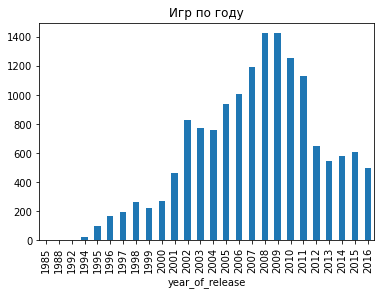

In [14]:
(df['year_of_release']
    .value_counts()
    .sort_index()
    .plot(kind='bar',
          title='Игр по году',
          xlabel='year_of_release'))

Из графика видно, что пик выпуска игр пришелся на 2008-2009 годы. Количество игр за период 1980-1990 годы незначительно, рост начинается с 1991 года. В настоящее время (2016) наблюдается спад выпуска игр.
Подсчитаем суммарные продажи игр в разрезе платформ и построим их распределение по годам.

<AxesSubplot:title={'center':'Суммарные продажи от игр'}, xlabel='platform'>

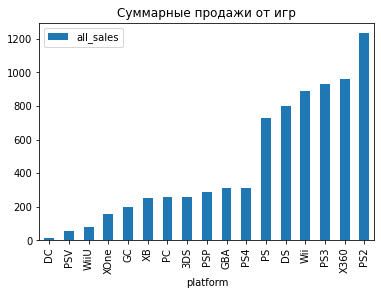

In [15]:
(pd.pivot_table(
    df,
    index=['platform'],
    aggfunc={'all_sales':np.sum})
   .sort_values('all_sales')
   .plot(kind='bar', title='Суммарные продажи от игр')
)

Видно, что наибольший доход у 6 платформ:
- PS,  
- DS,
- PS3,
- Wii,
- X360,
- PS2.  
Посмотрим на распределение доходов этих платформ в разрезе по годам.

<AxesSubplot:title={'center':'Компания PS3'}, xlabel='year_of_release'>

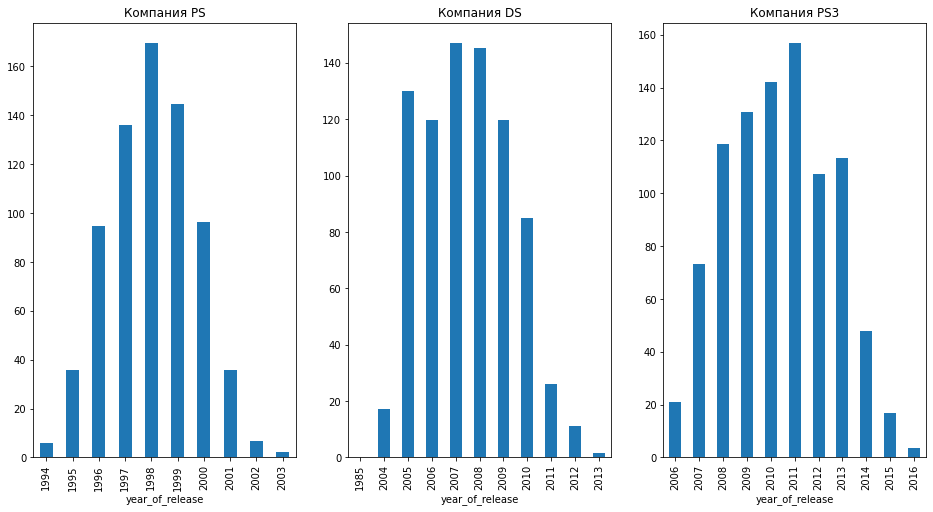

In [25]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 3, 1)
df.query('platform=="PS"').groupby('year_of_release')['all_sales'].sum().plot(kind='bar', title='Компания PS')
plt.subplot(1, 3, 2)
df.query('platform=="DS"').groupby('year_of_release')['all_sales'].sum().plot(kind='bar', title='Компания DS')
plt.subplot(1, 3, 3)
df.query('platform=="PS3"').groupby('year_of_release')['all_sales'].sum().plot(kind='bar', title='Компания PS3')

<AxesSubplot:title={'center':'Компания PS2'}, xlabel='year_of_release'>

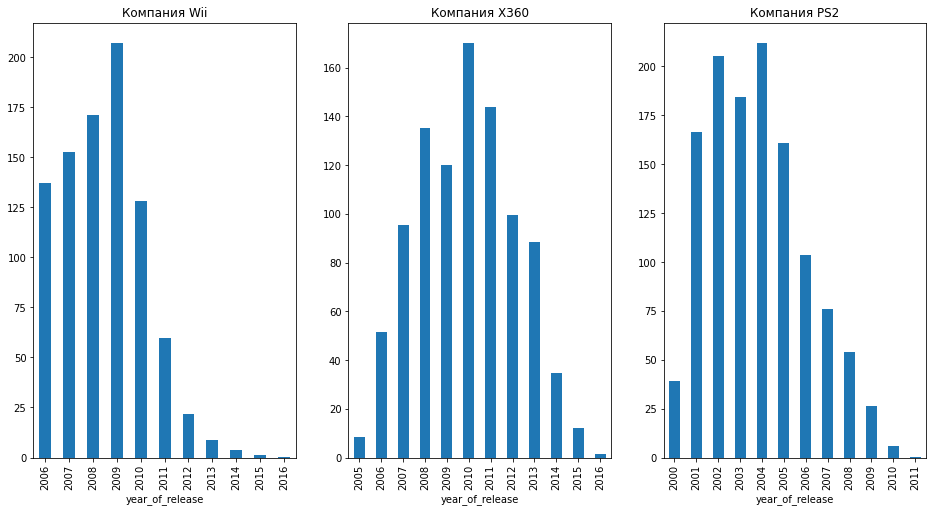

In [27]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 3, 1)
df.query('platform=="Wii"').groupby('year_of_release')['all_sales'].sum().plot(kind='bar', title='Компания Wii')
plt.subplot(1, 3, 2)
df.query('platform=="X360"').groupby('year_of_release')['all_sales'].sum().plot(kind='bar', title='Компания X360')
plt.subplot(1, 3, 3)
df.query('platform=="PS2"').groupby('year_of_release')['all_sales'].sum().plot(kind='bar', title='Компания PS2')

Из построенных графиков видно, что доходы новых игр растут за 4-5 лет до своего пика продаж, а затем в течение этого же срока  
продажи падают.  
Поскольку мы планируем продажи на 2017 год, а рост продаж игр происходит за 4-5 лет, то ограничимся выборкой с 2017-5=2012 года до 2016 (максимального в исходных данных).  
Построим график распределения прибыли и посмотрим, какие платформы сейчас растут.

<AxesSubplot:title={'center':'Суммарные продажи копий игр 2012-2016'}, xlabel='platform'>

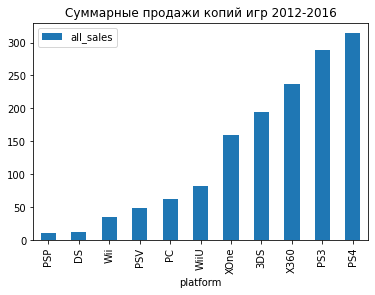

In [30]:
(pd.pivot_table(
    df.query('2012<=year_of_release<=2016'),
    index=['platform'],
    aggfunc={'all_sales':np.sum})
   .sort_values('all_sales')
   .plot(kind='bar', title='Суммарные продажи копий игр 2012-2016')
)

Рассмотрим продажи каждой компании в разрезе по годам отдельно

<AxesSubplot:title={'center':'Компания X360'}, xlabel='year_of_release'>

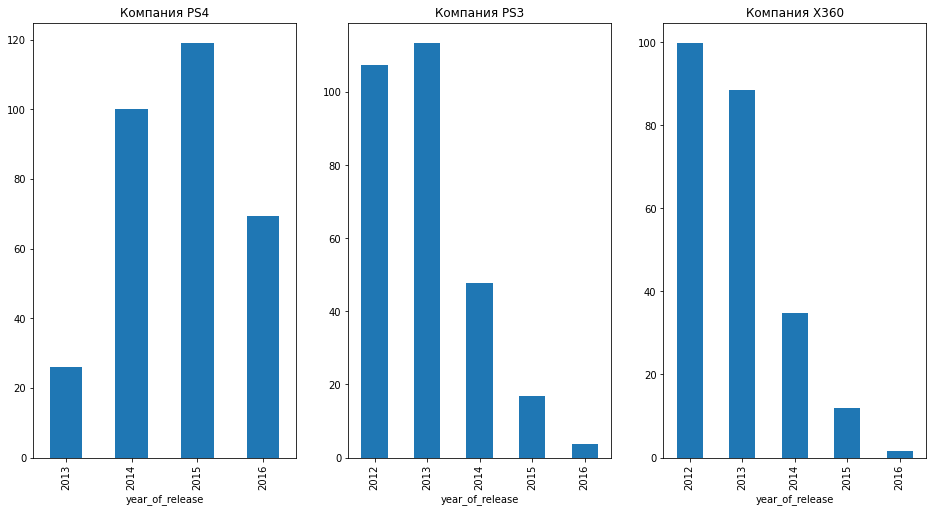

In [31]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 3, 1)
(df.query('platform=="PS4" and 2012<=year_of_release')
    .groupby('year_of_release')['all_sales']
    .sum().plot(kind='bar', title='Компания PS4'))
plt.subplot(1, 3, 2)
(df.query('platform=="PS3" and 2012<=year_of_release')
    .groupby('year_of_release')['all_sales']
    .sum().plot(kind='bar', title='Компания PS3'))
plt.subplot(1, 3, 3)
(df.query('platform=="X360" and 2012<=year_of_release')
    .groupby('year_of_release')['all_sales']
    .sum().plot(kind='bar', title='Компания X360'))

<AxesSubplot:title={'center':'Компания WiiU'}, xlabel='year_of_release'>

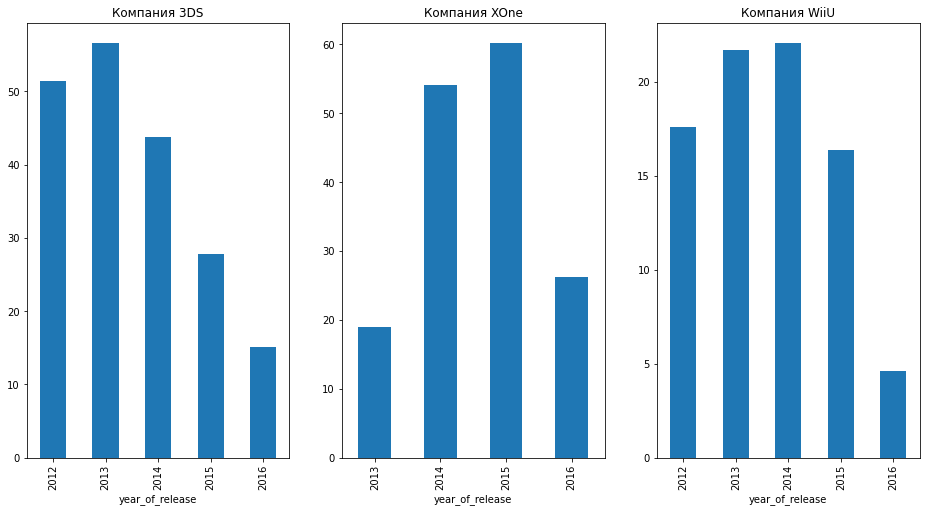

In [32]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 3, 1)
(df.query('platform=="3DS" and 2012<=year_of_release')
    .groupby('year_of_release')['all_sales']
    .sum().plot(kind='bar', title='Компания 3DS'))
plt.subplot(1, 3, 2)
(df.query('platform=="XOne" and 2012<=year_of_release')
    .groupby('year_of_release')['all_sales']
    .sum().plot(kind='bar', title='Компания XOne'))
plt.subplot(1, 3, 3)
(df.query('platform=="WiiU" and 2012<=year_of_release')
    .groupby('year_of_release')['all_sales']
    .sum().plot(kind='bar', title='Компания WiiU'))

<AxesSubplot:title={'center':'Компания Wii'}, xlabel='year_of_release'>

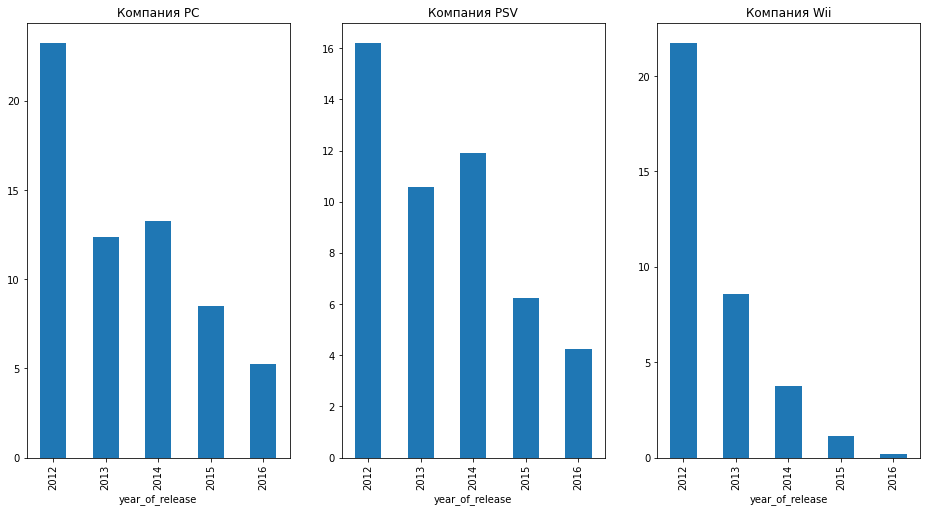

In [41]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 3, 1)
(df.query('platform=="PC" and 2012<=year_of_release')
    .groupby('year_of_release')['all_sales']
    .sum().plot(kind='bar', title='Компания PC'))
plt.subplot(1, 3, 2)
(df.query('platform=="PSV" and 2012<=year_of_release')
    .groupby('year_of_release')['all_sales']
    .sum().plot(kind='bar', title='Компания PSV'))
plt.subplot(1, 3, 3)
(df.query('platform=="Wii" and 2012<=year_of_release')
    .groupby('year_of_release')['all_sales']
    .sum().plot(kind='bar', title='Компания Wii'))

<AxesSubplot:title={'center':'Компания PSP'}, xlabel='year_of_release'>

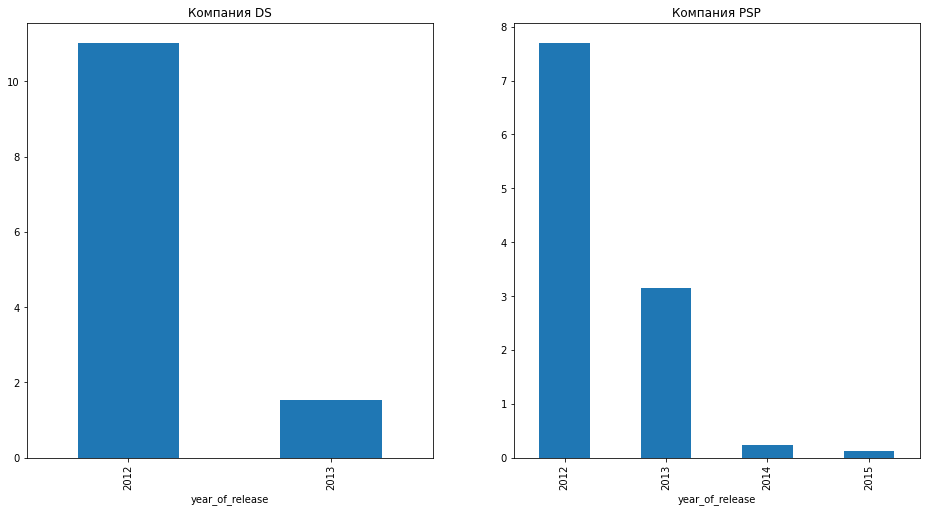

In [36]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
(df.query('platform=="DS" and 2012<=year_of_release')
    .groupby('year_of_release')['all_sales']
    .sum().plot(kind='bar', title='Компания DS'))
plt.subplot(1, 2, 2)
(df.query('platform=="PSP" and 2012<=year_of_release')
    .groupby('year_of_release')['all_sales']
    .sum().plot(kind='bar', title='Компания PSP'))

По распределению продаж в разрезе по годам сделаем ставку на следующие платформы:
- PS4 (пик - 2015, то есть прогнозируем сильный спад продаж к 2019),
- XOne (пик - 2015, то есть прогнозируем сильный спад продаж к 2019),
- WiiU (пик - 2014, то есть прогнозируем сильный спад продаж к 2020),
- PC (пик - 2011, спад должен был случиться в 2016, но показатели продаж позволяют оставить их хотя бы еще на 1 год),
- PSV (пик - 2012, сильный спад продаж ожидается в 2017, но показатели продаж 2016 позволяют оставить их хотя бы еще на 1 год).
Остальные компании находятся на спаде продаж.  
Далее будем работать только с тремя выбранными платформами.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
Из графика видно, что у лидирующих компаний есть существенные выбросы сверху. Отбросим значения продаж с показателями более 1.5, потому что максимальные значения для всех лежат ниже отметки в 1.5.

<AxesSubplot:title={'center':'all_sales'}, xlabel='platform'>

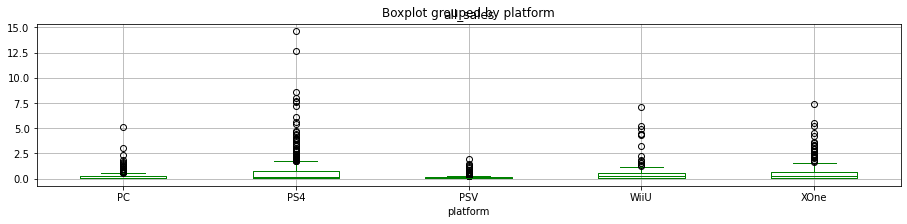

In [42]:
(df.query('2012<=year_of_release and platform in ("PS4","XOne","WiiU","PC","PSV")')
 .boxplot(
     column=['all_sales'],
     by='platform',
     grid=True,
     color='green',
     figsize=(15,3)))

<AxesSubplot:title={'center':'all_sales'}, xlabel='platform'>

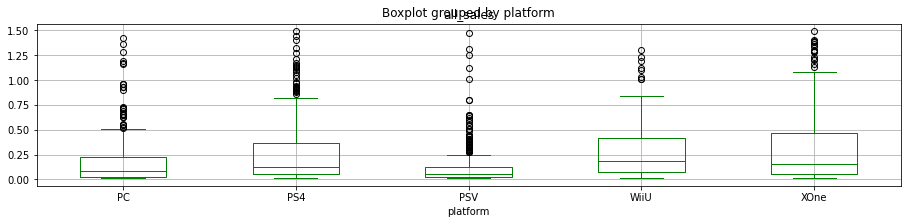

In [44]:
(df.query('2012<=year_of_release and platform in ("PS4","XOne","WiiU","PC","PSV") and all_sales<=1.5')
 .boxplot(
     column=['all_sales'],
     by='platform',
     grid=True,
     color='green',
     figsize=(15,3)))

Из построенных графиков мы увидили, что в данных много выбросов сверху. Основные значения укладываются в диапазон от 0 до 0,50.

Проверим, влияют ли на продажи отзывы пользователей и критиков. Для этого построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами на примере платформы XOne.

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
year_of_release,1.000000,-0.242667,-0.194925,-0.127050,-0.243414,0.053627,0.070786,-0.239183
na_sales,-0.242667,1.000000,0.765367,0.425725,0.988088,0.321088,-0.058520,0.970433
eu_sales,-0.194925,0.765367,1.000000,0.421071,0.852986,0.331332,-0.049543,0.898045
jp_sales,-0.127050,0.425725,0.421071,1.000000,0.441717,0.191284,0.065790,0.452701
other_sales,-0.243414,0.988088,0.852986,0.441717,1.000000,0.339487,-0.058661,0.995238
critic_score,0.053627,0.321088,0.331332,0.191284,0.339487,1.000000,0.429206,0.344060
user_score,0.070786,-0.058520,-0.049543,0.065790,-0.058661,0.429206,1.000000,-0.058090
all_sales,-0.239183,0.970433,0.898045,0.452701,0.995238,0.344060,-0.058090,1.000000


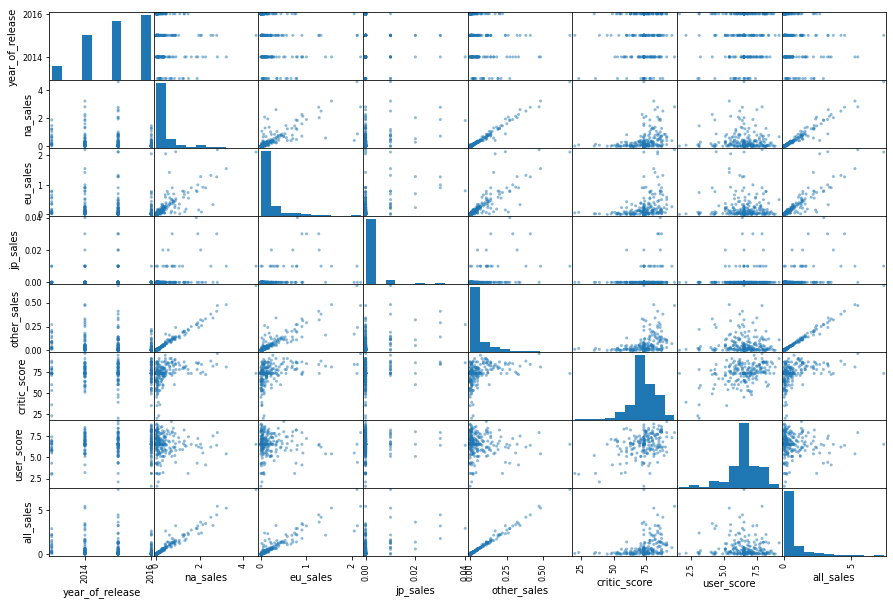

In [45]:
pd.plotting.scatter_matrix(df.query('platform=="XOne" and 2012<=year_of_release'), figsize=(15,10))
df.query('platform=="XOne" and 2012<=year_of_release').corr()

Из диаграммы рассеяния делаем следующие выводы:  
- Связь между оценками критиков и продажами - прямая (положительная) и средняя.
- Связь между оценками пользователей и продажами - обратная (отрицательная) и слабая, так что можно сказать, что оценки пользователей вообще не влияют на продажи.
- Критики более стабильны в своих оценках до 7,5, а дальше - на вкус и цвет.
- Пользователи же нестабильны в своих оценках и ставят чаще от 5 до 7,5.
- Оценки критиков влияют на продажи больше, чем оценки пользователей (0,34 против -0,06).

Проверим наши выводы по данным других платформ.

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
year_of_release,1.000000,-0.092848,-0.053163,-0.063587,-0.057375,0.064543,-0.023028,-0.083488
na_sales,-0.092848,1.000000,0.767484,0.271010,0.792277,0.263757,-0.051185,0.920981
eu_sales,-0.053163,0.767484,1.000000,0.265134,0.936906,0.267749,-0.055367,0.927487
jp_sales,-0.063587,0.271010,0.265134,1.000000,0.203078,0.035131,0.097309,0.450363
other_sales,-0.057375,0.792277,0.936906,0.203078,1.000000,0.263687,-0.044589,0.909525
critic_score,0.064543,0.263757,0.267749,0.035131,0.263687,1.000000,0.414415,0.269522
user_score,-0.023028,-0.051185,-0.055367,0.097309,-0.044589,0.414415,1.000000,-0.032677
all_sales,-0.083488,0.920981,0.927487,0.450363,0.909525,0.269522,-0.032677,1.000000


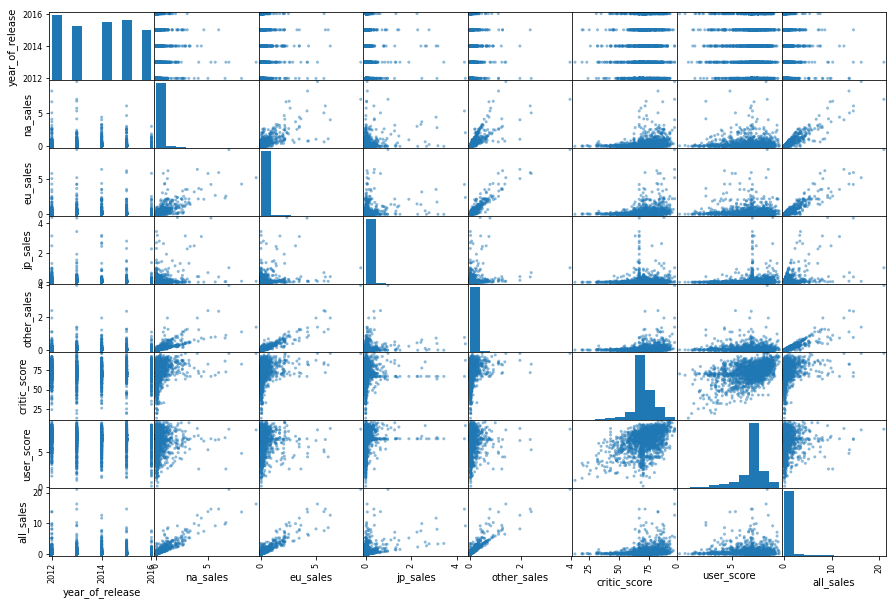

In [46]:
pd.plotting.scatter_matrix(df.query('2012<=year_of_release'), figsize=(15,10))
df.query('2012<=year_of_release').corr()

При построении диаграммы рассеяния на все платформы наши выводы подтверждаются:
- Связь между оценками критиков и продажами - прямая (положительная) и средняя.
- Связь между оценками пользователей и продажами - обратная (отрицательная) и слабая, так что можно сказать, что оценки пользователей вообще не влияют на продажи.
- Критики более стабильны в своих оценках, но уровень стабильности сместился с 7,5 до 6.
- Пользователи также нестабильны в своих оценках, верхняя планка диапазона оценок сместилась до 9,5.
- Оценки критиков влияют на продажи больше, чем оценки пользователей (0,27 против -0,03).

Посмотрим на общее распределение игр по жанрам. Для этого возьмем медианные значения продаж по платформам.

<AxesSubplot:title={'center':'Суммарные продажи игр 2012-2016 в разрезе жанров'}, xlabel='genre'>

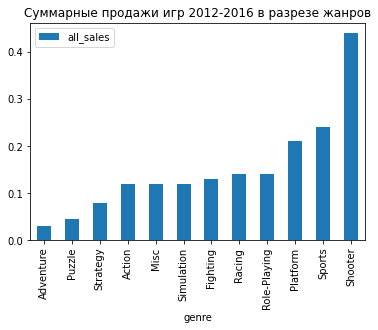

In [48]:
(pd.pivot_table(
    df.query('2012<=year_of_release'),
    index=['genre'],
    aggfunc={'all_sales':np.median})
   .sort_values('all_sales')
   .plot(kind='bar', title='Суммарные продажи игр 2012-2016 в разрезе жанров')
)


Из полученного распределения видим:
- Shooter - явный лидер: средний объем продаж превышает почти в 2 раза предшественника Sports;
- Adventure занял последнюю строчку (средний объем продаж меньше почти в 10 раз, чем Shooter).

***Вывод***

Пик выпуска игр пришелся на 2008-2009 годы. Количество игр за период 1980-1990 годы незначительно, рост начинается с 1991 года. В настоящее время (2016) наблюдается спад выпуска игр.  
Наибольший доход от суммарных продаж оказался у 6 платформ:
- PS,
- DS,
- PS3,
- Wii,
- X360,
- PS2.  
Исследование распределений продаж показало, что доходы новых платформ растут за 4-5 лет до своего пика продаж, а затем в течение этого же срока доходы падают.

Для дальнейших расчетов мы ограничились выборкой по году старше 2012 года и построили диаграмму размаха, которая показала, что в данных много выбросов сверху. Основные значения укладываются в диапазон от 0 до 1,05.  

Проанализировав связи между показателями оценок критиков и пользователей с количеством проданных копий, пришли к выводам:
- Наибольшее количество оценок находится в диапазоне от 5 до 9. Причем у пользователей больше оценок от 5 до 7,5, а у критиков - от 7 до 9.
- Оценки критиков влияют на продажи больше, чем оценки пользователей (0,23 против 0,07).

А самыми популярными и непопулярными жанрами оказались соответственно:  
- Shooter - явный лидер: средний объем продаж превышает почти в 2 раза предшественника Sports;
- Adventure занял последнюю строчку (средний объем продаж меньше почти в 10 раз, чем Shooter).

### Составляем портрет пользователя каждого региона

Определим топ-5 предпочтений пользователя каждого региона (NA, EU, JP):

In [49]:
display(df.groupby('platform').sum('na_sales').sort_values(by='na_sales', ascending=False)['na_sales'].head())

platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64

In [50]:
display(df.groupby('platform').sum('eu_sales').sort_values(by='eu_sales', ascending=False)['eu_sales'].head())

platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
Name: eu_sales, dtype: float64

In [51]:
display(df.groupby('platform').sum('jp_sales').sort_values(by='jp_sales', ascending=False)['jp_sales'].head())

platform
DS     175.02
PS     139.78
PS2    137.54
3DS    100.62
PS3     79.41
Name: jp_sales, dtype: float64

Анализ объемов продаж показывает, что в Северной Америке покупаю приблизительно в 2 раза больше, чем в Европе, а в Европе в такой же пропорции в сравнении с Японией. В Северной Америке больше всего игроманов. 

Посмотрим на топ-5 предпочтений регионов по жанрам игр:

In [52]:
display(df.groupby('genre').sum('na_sales').sort_values(by='na_sales', ascending=False)['na_sales'].head())

genre
Action     793.36
Sports     631.09
Shooter    517.36
Misc       382.45
Racing     315.93
Name: na_sales, dtype: float64

In [53]:
display(df.groupby('genre').sum('eu_sales').sort_values(by='eu_sales', ascending=False)['eu_sales'].head())

genre
Action     495.87
Sports     361.49
Shooter    306.78
Racing     221.87
Misc       206.27
Name: eu_sales, dtype: float64

In [54]:
display(df.groupby('genre').sum('jp_sales').sort_values(by='jp_sales', ascending=False)['jp_sales'].head())

genre
Role-Playing    262.42
Action          140.97
Sports           91.12
Misc             90.97
Platform         58.22
Name: jp_sales, dtype: float64

Топ-5 в Северной Америке и Европе совпадают, местами поменялись только 4 и 5 места. В Японии же популярными оказались ролевые игры. 3 жанра: Action, Sports, Misc присутствуют во всех рейтингах.  

Проверим влияние рейтинга ESRB на продажи внутри каждого региона:

In [55]:
display(df.groupby('rating').sum('na_sales').sort_values(by='na_sales', ascending=False)['na_sales'].head())

rating
E       1274.24
T        747.60
M        742.89
RP       684.35
E10+     345.50
Name: na_sales, dtype: float64

In [56]:
display(df.groupby('rating').sum('eu_sales').sort_values(by='eu_sales', ascending=False)['eu_sales'].head())

rating
E       703.87
M       480.00
RP      469.67
T       421.79
E10+    183.35
Name: eu_sales, dtype: float64

In [57]:
display(df.groupby('rating').sum('jp_sales').sort_values(by='jp_sales', ascending=False)['jp_sales'].head())

rating
RP      464.09
E       197.96
T       150.70
M        63.58
E10+     40.20
Name: jp_sales, dtype: float64

И Северная Америка, и Европа, и Япония предпочитают игры для всех, далее меняются местами игры для подростков и для взрослых и 4-е место занимают игры для малышей.  
Получается, что выбор пользователей не связан с регионом их проживания, он одинаков для всех людей.

***Вывод***

- в Северной Америке покупают приблизительно в 2 раза больше, чем в Европе, а в Европе - в 2 раза больше, чем в Японии; 
- 3 жанра попали в топ-5 для всех регионов: Action, Sports, Misc;  
- рейтинг ESRB не влияет на выбор пользователей какого-то отдельного региона;
- предпочтение игроков: игры для всех, игры для подростков, игры для взрослых, игры для малышей - а это все категории игроков в принципе.

### Проверяем гипотезы

Проверим 2 гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

*Средние пользовательские рейтинги платформ Xbox One и PC одинаковые*

Поскольку выборки по XOne и PC независимые, то воспользуемся методом st.ttest_ind для проверки гипотезы.  
Наша нулевая гипотеза -  'Средний пользовательский рейтинг платформы Xbox One равен пользовательскому рейтингу платформы PC'.  
Альтернативная гипотеза - 'Средний пользовательский рейтинг платформы Xbox One больше пользовательского рейтинга платформы PC'.  
Уровень статистической значимости примем 0,05.

In [58]:
print('Средний пользовательский рейтинг Xbox One:', df.query('platform=="XOne" and 2012<=year_of_release')['user_score'].mean())
print('Средний пользовательский рейтинг PC:', df.query('platform=="PC" and 2012<=year_of_release')['user_score'].mean())
H0='Средний пользовательский рейтинг платформы Xbox One равен пользовательскому рейтингу платформы PC'
H1='Средний пользовательский рейтинг платформы Xbox One больше пользовательского рейтинга платформы PC'
alpha=0.05
results=sp.ttest_ind(
    df.query('platform=="XOne" and 2012<=year_of_release')['user_score'],
    df.query('platform=="PC" and 2012<=year_of_release')['user_score'],
    equal_var=True,      
    alternative='greater'
)
print('p-значение:', results.pvalue)

if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средний пользовательский рейтинг Xbox One: 6.521428571428572
Средний пользовательский рейтинг PC: 6.540809006622517
p-значение: 0.562655521537095
Не получилось отвергнуть нулевую гипотезу


*Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.*

Поскольку выборки по рейтингам жанров Action и Sports независимые, то воспользуемся методом st.ttest_ind для проверки гипотезы.  
Наша нулевая гипотеза -  'Средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports'.  
Альтернативная гипотеза - 'Средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports'.  
Уровень статистической значимости примем 0,05.

***Вывод***

Проведенные тесты подтвердили, что наши гипотезы
- о равенстве средних пользовательских рейтингов платформ Xbox One и PC
- о неравенстве средних пользовательских рейтингов жанров Action и Sports  

*подтвердились*, что показывают и найденные средние значения пользовательских рейтингов для этих платформ (6,5 и 6,5) и жанров (6,88 и 5,85).

### Общий вывод

В начале исследования мы поставили перед собой задачу: выявить определяющие успешность игры закономерности, чтобы спланировать рекламные кампании.  
Для этого мы:
- подготовили исходные данные для анализа, приведя поля к нужным типам данных, заменив названия, избавившись от пропущенных значений удалением или заменой на средние значения;
- предположили, что все наши пропуски носят случайный характер и связаны с:  
    - локализацией продаж на одной территории,  
    - отсутствием запроса производителя на сбор данных пользователей, критиков и определения рейтинга,  
    - отсутствием этой информации в открытых источниках, 
    - ранним годом выпуска игр (до 2000),  
    - человеческим фактором;  
- проанализировали данные продаж игр по годам и выявили платформы, которые с большим отрывом лидировали по объемам продаж:  
    - PS,
    - DS,
    - PS3,
    - Wii,
    - X360,
    - PS2;
- сделали вывод, что период роста и падения продаж равен 4-5 лет, поэтому для дальнейших расчетов мы отфильтровали игры по году выпуска (старше 2012 года), чтобы достичь к 2017 году пика продаж или как минимум роста, а не падения;  
- построили диаграмму размаха, которая показала, что в данных много выбросов сверху, а основные значения укладываются в диапазон от 0 до 0,5;  
- проанализировали связи между показателями оценок критиков и пользователей с количеством проданных копий и пришли к выводам, что оценки критиков влияют на продажи и влияют больше, чем оценки пользователей (0,23 против 0,07);  
- провели анализ популярности жанров и выяснили, что:
    - Shooter - явный лидер: средний объем продаж превышает почти в 2 раза предшественника Sports;
    - Adventure занял последнюю строчку (средний объем продаж меньше почти в 10 раз, чем Shooter).
- проанализировали популярность жанров в разрезе регионов и выяснили, что в Северной Америке покупают приблизительно в 2 раза больше, чем в Европе, а в Европе - в 2 раза больше, чем в Японии;  
- определили 3 жанра, которые  попали в топ-5 для всех регионов: Action, Sports, Misc и поняли, что рейтинг ESRB не влияет на выбор пользователей какого-то отдельного региона, а предпочтение игроков: игры для всех, игры для подростков, игры для взрослых, игры для малышей - а это все категории игроков, в принципе;  
- выдвинули гипотезы и подтвердили их т-тестами для независимых выборок, получили выводы:  
    - равенстве средних пользовательских рейтингов платформ Xbox One и PC (6,5 и 6,5),
    - неравенстве средних пользовательских рейтингов жанров Action и Sports (6,88 и 5,85).
    
Таким образом, успешность игры для 2017 года определяют:
- возраст игры,
- оценка критиков,
- жанр игры.